In [17]:
# Import Data Science Libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.spatial.distance import cdist 
from matplotlib import pyplot as plt

# Display plots in Jupypter Notebooks
%matplotlib inline

# Import the Scikit-learn libraries
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [63]:
# load dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pd.read_csv(url, names=names)
dataframe = pd.read_csv(r"C:\Users\micha\Documents\GitHub\mkp_code\Institute of Data Course\Data\AmesHousing.csv")

In [21]:
# Create arrays - X: Variables, Y - Target
array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# Select Columns and store as arrays
X = dataframe.iloc[:,6,18:22].values
Y = dataframe["SalePrice"]

In [62]:
print(array)

[[842302 'M' 17.99 ... 0.4601 0.1189 nan]
 [842517 'M' 20.57 ... 0.275 0.08902 nan]
 [84300903 'M' 19.69 ... 0.3613 0.08757999999999999 nan]
 ...
 [926954 'M' 16.6 ... 0.2218 0.0782 nan]
 [927241 'M' 20.6 ... 0.4087 0.124 nan]
 [92751 'B' 7.76 ... 0.2871 0.07039 nan]]


In [24]:
# Convert to numpy array
Y = Y.values

In [25]:
# prepare configuration for cross validation test harness
seed = 7

In [26]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [14]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.936779 (0.036920)
LDA: 0.959555 (0.029449)
KNN: 0.926253 (0.046232)
CART: 0.931422 (0.034692)
NB: 0.936779 (0.036077)
SVM: 0.915758 (0.077166)


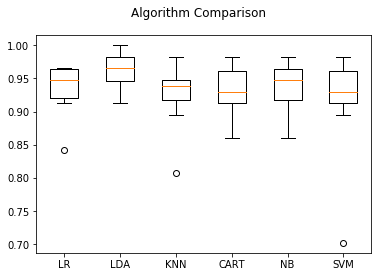

In [27]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()